<a href="https://colab.research.google.com/github/NosenkoArtem/Categorical-Encoding/blob/master/DL_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вебинар 1: Введение в нейросети и PyTorch


### 0.Основные концепции нейросетей и связь с биологическим нейроном

Использование нейронных сетей прошло через ряд этапов:
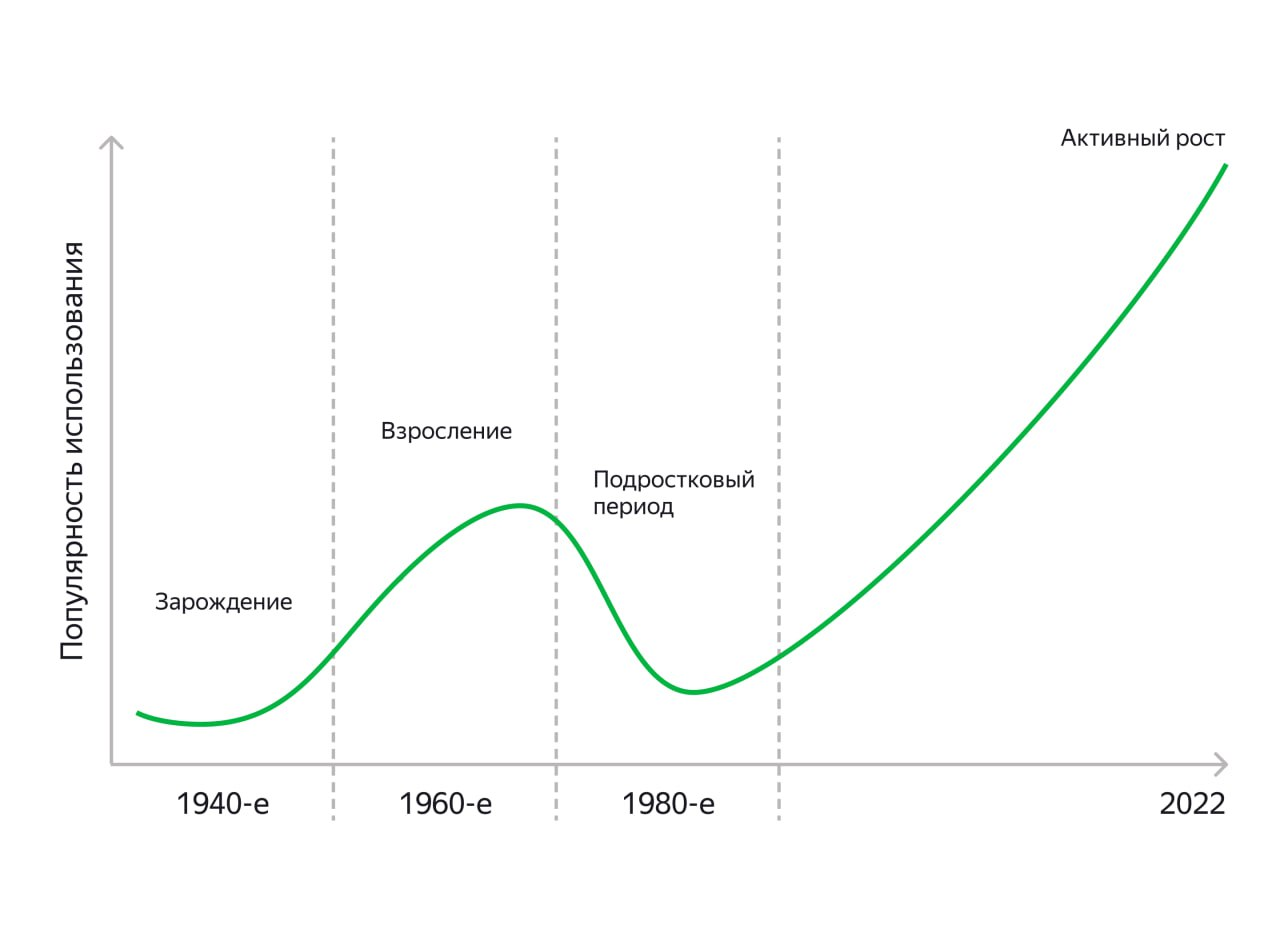

Задачи, которые решаются при помощи нейронных сетей:

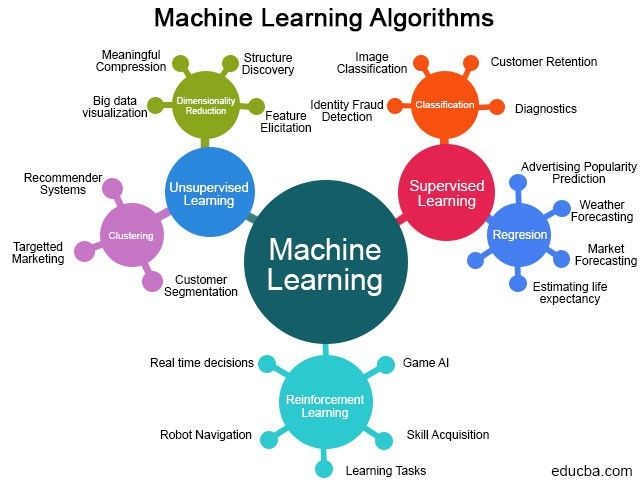

Биологический нейрон и искусственный нейрон выглядят схоже:
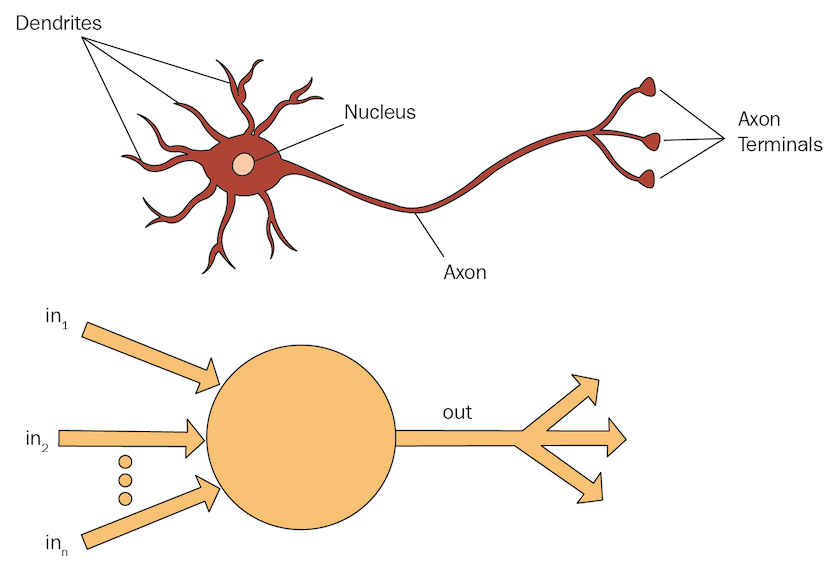

Простейшая нейронная сеть выглядит так:

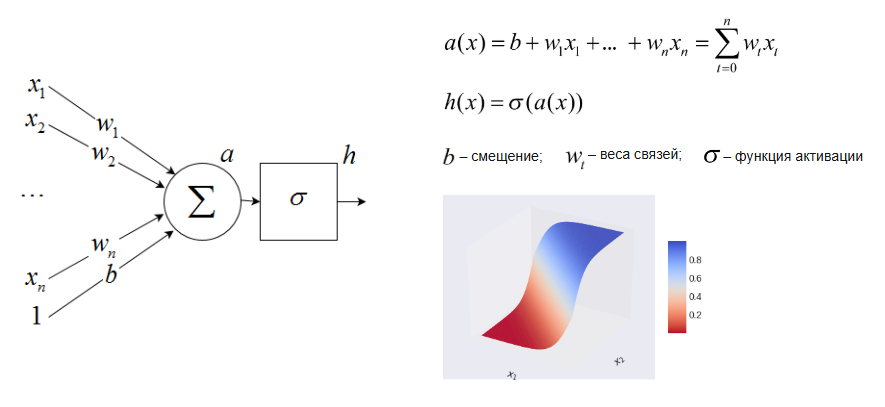

Простейшая нейронная сеть имеет непосредственную связь с обычными линейными моделями:

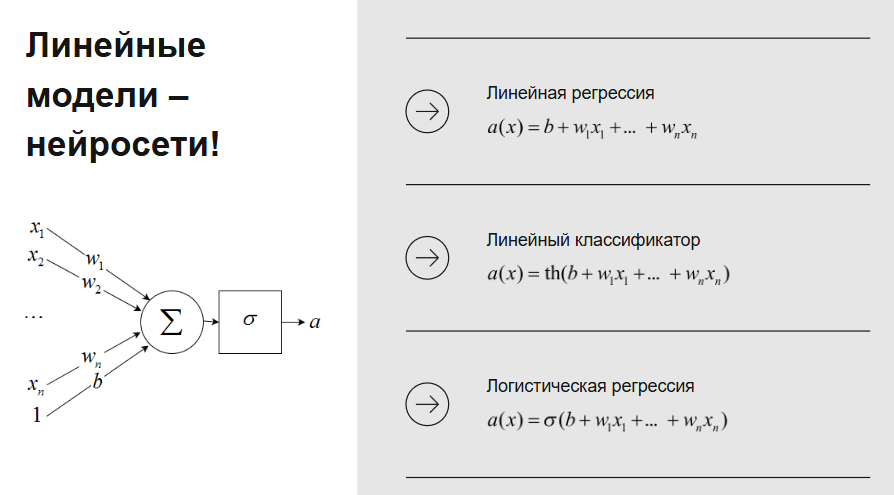

Что может один нейрон?

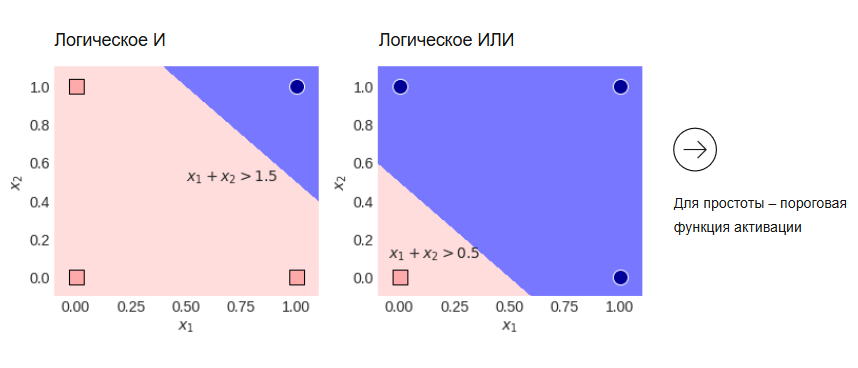

Что не может один нейрон?

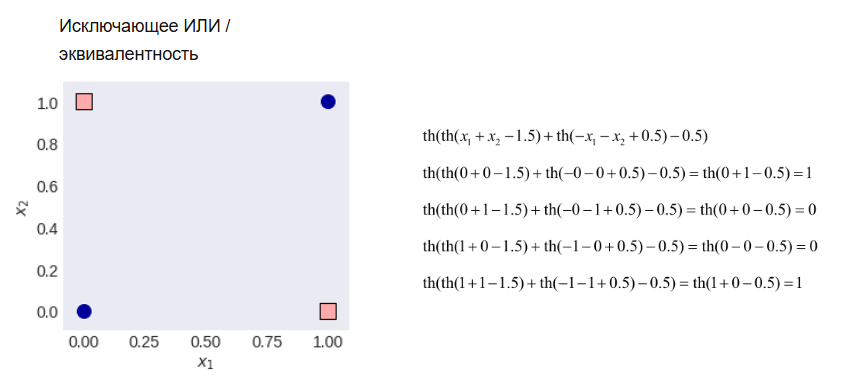

**PyTorch** — это популярная библиотека с открытым исходным кодом для машинного обучения и глубокого обучения, разработанная Facebook’s AI Research lab (FAIR). Она широко используется в академических и промышленных кругах для создания и обучения нейронных сетей.

In [1]:
import torch
import numpy as np
import random

In [16]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

random.seed(123)
np.random.seed(123)
# torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

### 1.Создание тензоров

В основе PyTorch лежат тензоры, которые представляют собой многомерные массивы данных, похожие на массивы NumPy, но с поддержкой вычислений на GPU. Тензоры в PyTorch могут быть одномерными (векторами), двумерными (матрицами) и многомерными (например, для работы с изображениями или видео).

##### 1.1. Создание тензора из списка:

In [4]:
# Создание тензора из списка
a = torch.tensor([1, 2, 3])
print(a)  # tensor([1, 2, 3])

tensor([1, 2, 3])


##### 1.2. Создание тензора с заданными размерами:

In [36]:
# Тензор из нулей
b = torch.zeros(3, 4)
print(b)  # 3x4 тензор из нулей

# Тензор из единиц
c = torch.ones(2, 3)
print(c)  # 2x3 тензор из единиц

# Тензор с случайными значениями
d = torch.rand(2, 2)
print(d)  # 2x2 тензор со случайными значениями

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.8854, 0.5739],
        [0.2666, 0.6274]])


##### 1.3. Создание тензора с одинаковыми значениями:

In [5]:
e = torch.full((2, 3), 7)
print(e)  # 2x3 тензор, заполненный числами 7

tensor([[7, 7, 7],
        [7, 7, 7]])


##### 1.4. Создание тензора с линейным распределением значений:

In [11]:
f = torch.linspace(0, 10, steps=5)
print(f)  # Линейное распределение от 0 до 10 с 5-ю шагами
np.linspace(0, 10, 5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])


array([ 0. ,  2.5,  5. ,  7.5, 10. ])

##### 1.5. Создание тензора со случайными целыми числами:

In [95]:
g = torch.randint(0, 10, (3, 3))
print(g)  # 3x3 тензор с целыми числами от 0 до 9

tensor([[8, 0, 6],
        [1, 4, 9],
        [7, 4, 0]])


### 2. Основные операции с тензорами

##### 2.1. Операции сложения, вычитания, умножения и деления:

In [12]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# Сложение
z = x + y
print(z)  # tensor([5, 7, 9])

# Вычитание
z = x - y
print(z)  # tensor([-3, -3, -3])

# Умножение поэлементное
z = x * y
print(z)  # tensor([4, 10, 18])

# Деление поэлементное
z = x / y
print(z)  # tensor([0.2500, 0.4000, 0.5000])

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])


In [17]:
# или вот так
# Сложение
z = x.add(y)
print(z)  # tensor([5, 7, 9])

# Вычитание
z = x.sub(y)
print(z)  # tensor([-3, -3, -3])

# Умножение поэлементное
z = x.mul(y)
print(z)  # tensor([4, 10, 18])

# Деление поэлементное
z = x.div(y)
print(z)  # tensor([0.2500, 0.4000, 0.5000])

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])


In [21]:
# или так. Это in-place методы
# Сложение
x.add_(y)
print(x)  # tensor([5, 7, 9])

tensor([17, 22, 27])


In [44]:
torch.manual_seed(123)

g = torch.randint(0, 10, (3, 3))
print(g)  # 3x3 тензор с целыми числами от 0 до 9

g.max(dim=0).values

tensor([[2, 9, 2],
        [0, 0, 2],
        [6, 7, 9]])


tensor([6, 9, 9])

##### 2.2. Операции матричного умножения:

In [27]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Матричное умножение
c = torch.matmul(a, b)
print(c)  # tensor([[19, 22], [43, 50]])

# или так
c = a @ b
print(c)  # tensor([[19, 22], [43, 50]])


# Поэлементное умножение
c = a * b
print(c)  # tensor([[5, 12], [21, 32]])

tensor([[19, 22],
        [43, 50]])
tensor([[19, 22],
        [43, 50]])
tensor([[ 5, 12],
        [21, 32]])


##### 2.3. Индексация и срезы:

In [28]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Индексация
print(t[0, 1])  # tensor(2)

# Срезы
print(t[:, 1])  # tensor([2, 5])
print(t[1, :])  # tensor([4, 5, 6])

tensor(2)
tensor([2, 5])
tensor([4, 5, 6])


##### 2.3.1 Индексация и срезы: выбор по индексу

In [42]:
# Выбор по индексу из другого тензора
q = torch.tensor([[0, 1], [1, 0]])
print(q)
r = torch.tensor([[10, 20], [30, 40]])
print(r)
print('------')
indexed_r = r.gather(dim=1, index=q)
print(indexed_r)  # tensor([[10, 20], [40, 30]])
print('--------------')
input_tensor = torch.tensor([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
print(input_tensor)
index_tensor = torch.tensor([[0, 1, 2], [1, 2, 0]])
print(index_tensor)
print('------')
output_tensor = torch.gather(input_tensor, 0, index_tensor)
print(output_tensor)

tensor([[0, 1],
        [1, 0]])
tensor([[10, 20],
        [30, 40]])
------
tensor([[10, 20],
        [40, 30]])
--------------
tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])
tensor([[0, 1, 2],
        [1, 2, 0]])
------
tensor([[10, 14, 18],
        [13, 17, 12]])


In [43]:
# Заполнение по индексу узказанными значениями
s = torch.zeros(2, 4) # создаем тензор размера (2, 4) из нулей
indices = torch.tensor([[2], [3]])
s = s.scatter(dim=1, index=indices, value=1)
print(s)

tensor([[0., 0., 1., 0.],
        [0., 0., 0., 1.]])


##### 2.4. Изменение размера тензора (Reshape):

<font color='DarkOrange'>**Вопрос (?)**</font> Расскажите как работает view в numpy?

In [44]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Преобразование в одномерный тензор
t_flat = t.view(-1)
print(t_flat)  # tensor([1, 2, 3, 4, 5, 6])

# Изменение формы
t_reshaped = t.view(3, 2)
print(t_reshaped)  # tensor([[1, 2], [3, 4], [5, 6]])

# Добавление нового измерения
unsqueezed_t = t.unsqueeze(0)  # Добавление в начале
print(unsqueezed_t.shape)  # torch.Size([1, 2, 3])

# Удаление измерения
squeezed_t = unsqueezed_t.squeeze(0)
print(squeezed_t.shape)  # torch.Size([2, 3])

tensor([1, 2, 3, 4, 5, 6])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([1, 2, 3])
torch.Size([2, 3])


##### 2.5. Соединение и разделение тензоров:

<font color='DarkOrange'>**Вопрос (?)**</font> Расскажите как работает axis в numpy?

In [49]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Соединение по оси 0
c = torch.cat((a, b), dim=0)
print(c)  # tensor([[1, 2], [3, 4], [5, 6], [7, 8]])

# Соединение по оси 1
d = torch.cat((a, b), dim=1)
print(d)  # tensor([[1, 2, 5, 6], [3, 4, 7, 8]])

# Разделение тензора
e = torch.chunk(c, 2, dim=0)
print(e)  # [tensor([[1, 2], [3, 4]]), tensor([[5, 6], [7, 8]])]

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])
(tensor([[1, 2],
        [3, 4]]), tensor([[5, 6],
        [7, 8]]))


##### 2.5.1 Соединение и разделение тензоров: split

In [45]:
n = torch.randn(4, 4)

# Разделение по заданным размерам
split_n2 = torch.split(n, [1, 3], dim=1)
for part in split_n2:
    print(part.shape)  # torch.Size([4, 1]) и torch.Size([4, 3])

m1 = torch.randn(3, 4)
m2 = torch.randn(3, 4)

# Стекинг создает новое измерение
stacked_m = torch.stack((m1, m2), dim=0)
print(stacked_m.shape)  # torch.Size([2, 3, 4])

torch.Size([4, 1])
torch.Size([4, 3])
torch.Size([2, 3, 4])


##### 2.6. Преобразование тензоров:

In [51]:
# Преобразование тензора в numpy массив
t = torch.tensor([[1, 2, 3], [4, 5, 6]])

np_array = t.numpy()
print(np_array)  # [[1 2 3] [4 5 6]]

# Преобразование numpy массива обратно в тензор
t2 = torch.from_numpy(np_array)
print(t2)  # tensor([[1, 2, 3], [4, 5, 6]])

# Преобразование тензора в тип данных float
t_float = t.float()
print(t_float)  # tensor([[1., 2., 3.], [4., 5., 6.]])

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


##### 2.7. Использование GPU:

In [52]:
# Проверка наличия GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен")
else:
    device = torch.device("cpu")
    print("Используется CPU")

# Перенос тензора на GPU
t_gpu = t.to(device)
print(t_gpu)


GPU доступен
tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')


##### 2.8 Освобождение неиспользуемой памяти:

In [53]:
# После выполнения операций
torch.cuda.empty_cache()

### 3. Продвинутые операции

##### 3.1. Broadcasting:

<font color='DarkOrange'>**Вопрос (?)**</font> Расскажите как работает broadcasting в numpy?

In [60]:
import numpy as np

# Создаем массивы
a = np.array([1, 2, 3])
b = np.array([[10], [20], [30]])

# Broadcasting происходит здесь
result = a + b

print(result)
print(a)
print(b)

[[11 12 13]
 [21 22 23]
 [31 32 33]]
[1 2 3]
[[10]
 [20]
 [30]]


In [61]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = torch.tensor([1, 2, 3])

# Broadcasting автоматически расширяет b до формы a и выполняет операцию
c = a + b
print(c)  # tensor([[2, 4, 6], [5, 7, 9]])

tensor([[2, 4, 6],
        [5, 7, 9]])


##### 3.2. Транспонирование:

In [62]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Транспонирование
a_t = a.t()
print(a_t)  # tensor([[1, 4], [2, 5], [3, 6]])

tensor([[1, 4],
        [2, 5],
        [3, 6]])


##### 3.3. Суммирование и усреднение по осям:

In [64]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Суммирование по строкам (ось 0)
print(a)
sum0 = a.sum(dim=0)
print(sum0)  # tensor([5, 7, 9])

# Усреднение по столбцам (ось 1)
# Обязательно указывать тип выходного тензора `dtype=torch.float32` при
# входном тензоре из целых чисел, иначе – ошибка
mean1 = a.mean(dim=1, dtype=torch.float32)
print(mean1)  # tensor([2., 5.])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([5, 7, 9])
tensor([2., 5.])


##### 3.4. Сравнение тензоров:

In [66]:
torch.nonzero?

In [65]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([3, 2, 1])

# Элементное сравнение
print(a == b)  # tensor([False,  True, False])

# Получение индексов элементов по условию
print(torch.nonzero(a > 1))  # tensor([[1], [2]])

tensor([False,  True, False])
tensor([[1],
        [2]])


##### 3.5 Сложные математические функции:

In [67]:
a = torch.tensor([0.5, 1.0, 1.5])

# Синус
sin_a = torch.sin(a)
print(sin_a)  # tensor([0.4794, 0.8415, 0.9975])

# Экспонента
exp_a = torch.exp(a)
print(exp_a)  # tensor([1.6487, 2.7183, 4.4817])

# Логарифм
log_a = torch.log(a)
print(log_a)  # tensor([-0.6931,  0.0000,  0.4055])

# Возведение в степень
pow_c = torch.pow(a, 2)
print(pow_c)  # tensor([0.2500, 1.0000, 2.2500])

tensor([0.4794, 0.8415, 0.9975])
tensor([1.6487, 2.7183, 4.4817])
tensor([-0.6931,  0.0000,  0.4055])
tensor([0.2500, 1.0000, 2.2500])


##### 3.6 Округление и обрезание значений:

In [68]:
b = torch.tensor([1.3, 2.7, 3.5, 4.8])

# Округление до ближайшего целого
rounded = torch.round(b)
print(rounded)  # tensor([1., 3., 4., 5.])

# Округление вниз
floor = torch.floor(b)
print(floor)  # tensor([1., 2., 3., 4.])

# Округление вверх
ceil = torch.ceil(b)
print(ceil)  # tensor([2., 3., 4., 5.])

# Обрезание значений в заданном диапазоне
clamped = torch.clamp(b, min=2.0, max=4.0)
print(clamped)  # tensor([2.0000, 2.7000, 3.5000, 4.0000])

tensor([1., 3., 4., 5.])
tensor([1., 2., 3., 4.])
tensor([2., 3., 4., 5.])
tensor([2.0000, 2.7000, 3.5000, 4.0000])


##### 3.7 Элементные операции:

In [ ]:
c = torch.tensor([1, 2, 3])
d = torch.tensor([4, 5, 6])

# Максимум поэлементно
max_vals = torch.max(c, d)
print(max_vals)  # tensor([4, 5, 6])

# Минимум поэлементно
min_vals = torch.min(c, d)
print(min_vals)  # tensor([1, 2, 3])

tensor([4, 5, 6])
tensor([1, 2, 3])


##### 3.8 Кумулятивные суммы и произведения:

In [ ]:
h = torch.tensor([1, 2, 3, 4])

# Кумулятивная сумма
cumsum_h = torch.cumsum(h, dim=0)
print(cumsum_h)  # tensor([1, 3, 6, 10])

# Кумулятивное произведение
cumprod_h = torch.cumprod(h, dim=0)
print(cumprod_h)  # tensor([1, 2, 6, 24])

tensor([ 1,  3,  6, 10])
tensor([ 1,  2,  6, 24])


### 4. Автоматическое дифференцирование

PyTorch имеет встроенную систему автоматического вычисления градиентов, которая позволяет эффективно обучать нейронные сети. Эта система называется Autograd. Она отслеживает все операции с тензорами и автоматически вычисляет градиенты, необходимые для алгоритма обратного распространения (backpropagation).

##### 4.1. Создание тензора с включенным вычислением градиентов:

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Операции с тензором
y = x + 2
z = y * y * 3
out = z.mean()

# Вычисление градиентов
out.backward()
print(x.grad)  # tensor([ 6.,  8., 10.])

tensor([ 6.,  8., 10.])


<font color='DarkOrange'>**Задача (?)**</font> Вычислите градиент аналитически

##### 4.2. Отключение вычисления градиентов (например, для оценки модели):

In [ ]:
with torch.no_grad():
    y = x * 2
    print(y)  # tensor([2., 4., 6.])

tensor([2., 4., 6.])


### 5. Сохранение и загрузка тензоров

##### 5.1. Сохранение тензора:

In [ ]:
torch.save(x, 'tensor.pt')

##### 5.2. Загрузка тензора:

In [ ]:
x_loaded = torch.load('tensor.pt')
print(x_loaded)  # tensor([1., 2., 3.], requires_grad=True)

tensor([1., 2., 3.], requires_grad=True)


<ipython-input-29-32f3f900ae9e>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_loaded = torch.load('tensor.pt')


### 6. Дополнительные операции над тензорами

##### 6.1 Работа с комплексными числами:

PyTorch поддерживает тензоры с комплексными числами для специализированных задач.

In [ ]:
# Создание комплексного тензора
t_complex = torch.tensor([1 + 2j, 3 + 4j])

# Модуль комплексного числа
abs_t = torch.abs(t_complex)
print(abs_t)  # tensor([2.2361, 5.0000])

# Аргумент комплексного числа
angle_t = torch.angle(t_complex)
print(angle_t)  # tensor([1.1071, 0.9273])

tensor([2.2361, 5.0000])
tensor([1.1071, 0.9273])


##### 6.2 Операции с использованием функции einsum

`einsum` позволяет выполнять сложные операции над тензорами с использованием нотации Эйнштейна.

In [ ]:
# Пример матричного умножения с помощью einsum
a = torch.randn(2, 3)
b = torch.randn(3, 4)
c = torch.einsum('ik,kj->ij', a, b)
print(c.shape)  # torch.Size([2, 4])

# Вычисление суммы диагональных элементов матрицы
d = torch.randn(4, 4)
trace_d = torch.einsum('ii->', d)
print(trace_d)

torch.Size([2, 4])
tensor(-0.9611)


##### 6.3 Генерация случайных чисел из различных распределений

PyTorch поддерживает генерацию случайных чисел из множества статистических распределений.

In [ ]:
# Нормальное распределение
normal_dist = torch.normal(mean=0, std=1, size=(3, 3))
print(normal_dist)

# Бета-распределение
beta_dist = torch.distributions.Beta(0.5, 0.5)
samples = beta_dist.sample((3, 3))
print(samples)

# Бернуллиевское распределение
bernoulli_dist = torch.bernoulli(torch.full((3, 3), 0.7))
print(bernoulli_dist)

tensor([[-0.2123, -0.0980,  0.4140],
        [-0.0650,  1.2118, -1.0325],
        [ 0.2552, -0.3849,  1.7028]])
tensor([[0.9511, 0.0040, 0.6672],
        [0.7908, 0.0688, 0.6371],
        [0.8920, 0.7959, 0.9966]])
tensor([[1., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])


##### 6.4 Интероперабельность с NumPy

PyTorch тесно интегрируется с NumPy, позволяя легко преобразовывать данные между ними.

Замечание: Тензоры и массивы NumPy будут разделять память, если это возможно. Изменения в одном отразятся на другом.

In [ ]:
import numpy as np

# Тензор в массив NumPy
t = torch.tensor([1, 2, 3])
np_array = t.numpy()
print(np_array)  # array([1, 2, 3])

# Массив NumPy в тензор
np_array = np.array([4, 5, 6])
t_from_np = torch.from_numpy(np_array)
print(t_from_np)  # tensor([4, 5, 6])

[1 2 3]
tensor([4, 5, 6])


##### 6.5 Квантование тензоров для оптимизации

Квантование позволяет уменьшить размер модели и ускорить ее выполнение, преобразовывая тензоры в более низкую точность.

In [ ]:
# Квантование тензора
t = torch.randn(10)
q_t = torch.quantize_per_tensor(t, scale=0.1, zero_point=10, dtype=torch.qint8)
print(q_t)

# Деквантование обратно в float
deq_t = q_t.dequantize()
print(deq_t)

tensor([ 0.6000,  0.1000, -1.7000, -0.8000,  1.5000,  0.4000, -1.1000,  0.3000,
         1.4000, -1.1000], size=(10,), dtype=torch.qint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.1, zero_point=10)
tensor([ 0.6000,  0.1000, -1.7000, -0.8000,  1.5000,  0.4000, -1.1000,  0.3000,
         1.4000, -1.1000])


##### 6.6 Перенос тензоров между устройствами

In [ ]:
# Создание тензора на CPU
cpu_t = torch.randn(3, 3)

# Перенос на GPU
if torch.cuda.is_available():
    gpu_t = cpu_t.to('cuda')
    print(gpu_t.device)  # cuda:0

    # Обратно на CPU
    cpu_t_again = gpu_t.to('cpu')
    print(cpu_t_again.device)  # cpu

cuda:0
cpu


##### 6.7 Использование нескольких GPU

In [ ]:
# Проверка количества доступных GPU
num_gpus = torch.cuda.device_count()
print(f"Available GPUs: {num_gpus}")

# Назначение тензоров на разные GPU
if num_gpus >= 2:
    t1 = torch.randn(3, 3, device='cuda:0')
    t2 = torch.randn(3, 3, device='cuda:1')

    # Перенос тензоров для операции
    result = t1.to('cuda:1') + t2
    print(result.device)  # cuda:1

Available GPUs: 1


### 7. Структура библиотеки torch

##### 7.1 Нейронные сети torch.nn

- **Модули** (`Modules`): Основной строительный блок для создания нейронных сетей — это `torch.nn.Module`. Каждый слой, включая полносвязные (`Linear`), сверточные (`Conv2d`), рекуррентные (`RNN`), является подклассом `Module`.
- **Функции активации**: `torch.nn` предоставляет набор функций активации, таких как `ReLU`, `Sigmoid`, `Tanh` и др.
- **Функций потерь**: В `torch.nn` есть предопределенные функции потерь, такие как кросс-энтропийная потеря (`CrossEntropyLoss`), среднеквадратичная ошибка (MSELoss), бинарная кросс-энтропия (`BCELoss`), и многие другие.

In [ ]:
from torch import nn

In [ ]:
nn.Linear?

In [ ]:
from torch import nn


input = torch.normal(mean=0, std=1, size=(3, 3))
print(input)

# Полносвязный линейный слой
linear = nn.Linear(3, 4)
output = linear(input)
print(output)

# Функция активации
relu = nn.ReLU()
output = relu(input)
print(output)

# Функция потерь (пример 3 объекта)
target = torch.tensor([1, 0, 1])
loss_func = nn.CrossEntropyLoss()
loss = loss_func(input, target)
print(loss)

tensor([[ 0.8195,  0.4264,  0.6699],
        [ 1.0699,  0.9885,  1.3427],
        [ 0.0706,  0.1601, -0.4197]])
tensor([[ 0.0063,  0.1039,  0.0418,  0.1367],
        [ 0.3704,  0.6822,  0.1389, -0.0060],
        [-0.2916, -0.5270, -0.2278,  0.1683]], grad_fn=<AddmmBackward0>)
tensor([[0.8195, 0.4264, 0.6699],
        [1.0699, 0.9885, 1.3427],
        [0.0706, 0.1601, 0.0000]])
tensor(1.1346)


##### 7.2 Оптимизация torch.optim

- Оптимизаторы: PyTorch предоставляет различные оптимизаторы, такие как `SGD`, `Adam`, `RMSprop`, которые используются для обновления параметров модели на основе градиентов, рассчитанных autograd.
- Обновление параметров: Оптимизатор получает параметры модели и шаг градиента для обновления параметров с помощью метода `step()`.

In [ ]:
from torch import optim


x = torch.randn(3, 3)
y = torch.randn(3, 3, requires_grad=True)
z = (x @ y).mean() # будем минимизировать значение матричного произведения Z=XY по Y

# Оптимизатор Adam переменной y
optimizer = optim.Adam([y], lr=2e-4, betas=(0.5, 0.999))

# Минимизируем значение z, считаем градиенты
z.backward()

# Значение в y до всех манипуляций
print(y.data)

# Делаем шаг оптимизатора. Хотим минимизировать z, изменяя y
optimizer.step()

# Новое значение y
print(y.data)

tensor([[ 0.1684, -1.3007, -2.2987],
        [-0.1371, -1.2505,  0.7757],
        [ 0.6870, -1.4628,  0.2260]])
tensor([[ 0.1682, -1.3009, -2.2989],
        [-0.1369, -1.2503,  0.7759],
        [ 0.6872, -1.4626,  0.2262]])


## Advanced-информация

##### Работа с разреженными (sparse) тензорами

Разреженные тензоры эффективны для хранения данных, где большинство элементов равны нулю.

In [ ]:
# Создание разреженного тензора
indices = torch.tensor([[0, 1, 1],
                        [2, 0, 2]])
values = torch.tensor([3, 4, 5])
size = torch.Size([2, 3])
sparse_t = torch.sparse_coo_tensor(indices, values, size)

print(sparse_t)

tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3, 4, 5]),
       size=(2, 3), nnz=3, layout=torch.sparse_coo)


##### In-place операции

In-place операции выполняются непосредственно на исходном тензоре без создания копий, что экономит память.

Важно: Будьте осторожны с in-place операциями при использовании автограда, так как они могут вызвать ошибки при вычислении градиентов.

In [ ]:
t = torch.tensor([1, 2, 3])

# Обычная операция
t_add = t + 2
print(t_add)  # tensor([3, 4, 5])

# In-place операция
t.add_(2)
print(t)  # tensor([3, 4, 5])

tensor([3, 4, 5])
tensor([3, 4, 5])


Помимо этого в PyTorch есть модули:

- `torch.utils.data`: Включает инструменты для работы с наборами данных и создания загрузчиков данных (`DataLoader`), которые позволяют легко и эффективно управлять загрузкой данных в модель.
- `torch.distributed`: Поддерживает распределенное обучение на нескольких машинах и устройствах. Включает инструменты для синхронизации моделей, распределения данных и параллельных вычислений.
- `torch.cuda`: Модуль для работы с GPU, позволяет переносить тензоры на GPU и выполнять вычисления на них. Поддерживает функции синхронизации, управления памятью и другие аспекты работы с CUDA.
- `torch.multiprocessing`: Поддерживает создание многопроцессорных приложений, например, для параллельной загрузки данных или распределенной обработки.
- `torch.quantization`: Модуль для квантизации моделей, который позволяет уменьшить размер модели и ускорить выполнение, сохраняя при этом приемлемую точность.

Дополнительные модули:
- `torchvision`: Модуль для задач компьютерного зрения. Включает предопределенные модели, функции для обработки изображений и популярные наборы данных, такие как MNIST, CIFAR-10, ImageNet.
- `torchtext`: Модуль для обработки текстовых данных. Включает инструменты для токенизации, векторизации текста, работы с векторами слов и загрузки текстовых данных.
- `torchaudio`: Модуль для работы с аудиоданными. Включает функции для чтения, преобразования и анализа аудиосигналов, а также предобученные модели для задач, связанных с обработкой аудио.